In [59]:
import rdflib
from rdflib import URIRef, Literal, Graph

import loader
import discourse
import pandas as pd
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, RDFS
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

import owlready2 as owlr


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g


def nan2None(value):
    if pd.isnull(value) :
        return None
    else:
        return value


def get_data_rows(filename):
    data_rows_df = pd.read_csv(filename)
    data_rows=[]
    for i,r in data_rows_df.iterrows():
        r_d = {k:nan2None(v) for k,v in dict(r).items()}

        data_rows.append(r_d)
    del data_rows_df
    return data_rows

serial_key = { "Business Domain" : "ModelDomain", 
               "Model" : "Model", 
               "ModelType" : "ModelType", 
               "Entity" : "Class", 
               "Attribute" : "Attribute", 
               "DataType" : "DataType", 
               "Context" : "Context", 
               "SubContext" : "SubContext", 
               "Relationship" : "Relationship", 
               "Entity From" : "FromClass",
               "Attribute From" : "FromAttribute", 
               "Cardinality From" : "FromCardinality",
               "Entity To" : "ToClass",
               "Attribute To" : "ToAttribute",
               "Cardinality To" : "ToCardinality"
}

onto = owlr.get_ontology("datamodels_rdf.owl").load()
ser_onto = owlr.get_ontology("Serialization.owl").load()
def flush(onto):
    for m in onto.Serialization.instances()[0].Contains:
        print(m, m.is_a)
flush(onto)
owlr.sync_reasoner(onto)


datamodels_rdf.Mapping_Attribute [datamodels_rdf.EntityMapping, Serialization.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.DataPropertyMapping, Serialization.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.EntityMapping, Serialization.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.PropertyMapping, Serialization.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.EntityMapping, Serialization.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.PropertyMapping, Serialization.Mapping]
datamodels_rdf.Mapping_ContextContainsSubContext [datamodels_rdf.PropertyMapping, Serialization.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.PropertyMapping, Serialization.Mapping]
datamodels_rdf.Mapping_FromAttribute [datamodels_rdf.EntityMapping, Serialization.Mapping]
datamodels_rdf.Mapping_FromClass [datamodels_rdf.EntityMapping, Serialization.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.EntityMappin

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpsrm0ydm1
* Owlready2 * HermiT took 0.7223808765411377 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [60]:
for i in onto.individuals():
    print("thing", i.iri)
#    print(dir(i))
#    for ip in i.get_properties():
#        try:
#            print("\t", ip.iri, getattr(i, ip.python_name))
#        except:
#            print("\t", ip.iri, "?")
#            pass

thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_AttributeHasDataType
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Class
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ClassContainsAttribute
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Context
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ContextContainsClass
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ContextContainsSubContext
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_DomainContainsModel
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_FromAttribute
thing http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_FromClass
thing http://

In [61]:
onto.search(is_a=onto.MetaClass)

[datamodels_rdf.MetaClass, datamodels_rdf.Attribute, datamodels_rdf.Model, datamodels_rdf.Class, datamodels_rdf.Context, datamodels_rdf.ModelDomain, datamodels_rdf.Relationship, datamodels_rdf.CompoundAttribute, datamodels_rdf.FunctionalIdentifier, datamodels_rdf.FunctionalPartialIdentifier, datamodels_rdf.ConceptualDataModel, datamodels_rdf.LogicalDataModel, datamodels_rdf.MasterDataModel, datamodels_rdf.PhysicalDataModel, datamodels_rdf.AbstractClass, datamodels_rdf.ConceptClass, datamodels_rdf.LogicalEntityClass, datamodels_rdf.PhysicalEntityClass]

In [62]:
onto.search(is_a=onto.MetaProperty)

[datamodels_rdf.MetaProperty, datamodels_rdf.Contains, datamodels_rdf.MemberOf, datamodels_rdf.RelationshipFromAttribute, datamodels_rdf.RelationshipFromClass, datamodels_rdf.RelationshipToAttribute, datamodels_rdf.RelationshipToClass]

In [63]:
onto.search(is_a=onto.MetaDataProperty)

[datamodels_rdf.MetaDataProperty, datamodels_rdf.Cardinality, datamodels_rdf.DataType, datamodels_rdf.FromCardinality, datamodels_rdf.ModelType, datamodels_rdf.Optionality, datamodels_rdf.ToCardinality]

In [84]:
# These are all the pointers to meta contents authored in specific ontologies elsewhere
meta_contents = []
for m in sorted(onto.MetaClass.instances(), key=lambda x:x.name):
    print(m)
    t = (URIRef(m.iri), URIRef(RDF.type), URIRef(ser_onto.MetaClass.iri))
    meta_contents.append(t)
    
for m in sorted(onto.MetaProperty.instances(), key=lambda x:x.name):
    print(m)
    t = (URIRef(m.iri), URIRef(RDF.type), URIRef(ser_onto.MetaProperty.iri))
    meta_contents.append(t)
    
for m in sorted(onto.MetaDataProperty.instances(), key=lambda x:x.name):
    print(m)
    t = (URIRef(m.iri), URIRef(RDF.type), URIRef(ser_onto.MetaDataProperty.iri))
    meta_contents.append(t)
    


datamodels_rdf.Attribute
datamodels_rdf.Attribute
datamodels_rdf.Class
datamodels_rdf.Class
datamodels_rdf.Context
datamodels_rdf.Context
datamodels_rdf.Model
datamodels_rdf.Model
datamodels_rdf.ModelDomain
datamodels_rdf.ModelDomain
datamodels_rdf.Relationship
datamodels_rdf.Relationship
datamodels_rdf.Contains
datamodels_rdf.Contains
datamodels_rdf.MemberOf
datamodels_rdf.MemberOf
datamodels_rdf.RelationshipFromAttribute
datamodels_rdf.RelationshipFromAttribute
datamodels_rdf.RelationshipFromClass
datamodels_rdf.RelationshipFromClass
datamodels_rdf.RelationshipToAttribute
datamodels_rdf.RelationshipToAttribute
datamodels_rdf.RelationshipToClass
datamodels_rdf.RelationshipToClass
datamodels_rdf.Cardinality
datamodels_rdf.Cardinality
datamodels_rdf.DataType
datamodels_rdf.DataType
datamodels_rdf.FromCardinality
datamodels_rdf.FromCardinality
datamodels_rdf.ModelType
datamodels_rdf.ModelType
datamodels_rdf.Optionality
datamodels_rdf.Optionality
datamodels_rdf.ToCardinality
datamodels_rd

In [85]:
# Mappings belong to the serialization ontology (so types should be updated accordingly)
mappings = []
for m in onto.Mapping.instances():
    print(m)
    t = (URIRef(m.iri), URIRef(RDF.type), URIRef(ser_onto.Mapping.iri))
    mappings.append(t)
    for p in m.get_properties():
        if p == onto.MappingMetaTarget:
            mt = p[m].first().iri
            if URIRef(mt) not in [c[0] for c in meta_contents]:
                print(mt, "not in meta_contents")
            t=(URIRef(m.iri), URIRef(ser_onto.MappingMetaTarget.iri), URIRef(mt))
        elif p in (onto.SerializationParentLabel, onto.SerializationLabel, onto.MappingDomain, onto.MappingRange):
            pl=p[m].first()
            t=(URIRef(m.iri), URIRef(p.iri.replace(onto.base_iri,ser_onto.base_iri)), Literal(pl))
        else:
            print("\t", p, "other")
            t=None
        
        if t is not None:
        
            mappings.append(t)
mappings 

datamodels_rdf.Mapping_Attribute
	 datamodels_rdf.MemberOf other
	 Serialization.MappingMetaTarget other
	 Serialization.MappingMemberOf other
	 Serialization.SerializationParentLabel other
	 Serialization.SerializationLabel other
datamodels_rdf.Mapping_AttributeHasDataType
	 datamodels_rdf.MemberOf other
	 Serialization.MappingRange other
	 Serialization.MappingMetaTarget other
	 Serialization.MappingMemberOf other
	 Serialization.MappingDomain other
datamodels_rdf.Mapping_Class
	 datamodels_rdf.MemberOf other
	 Serialization.MappingMetaTarget other
	 Serialization.MappingMemberOf other
	 Serialization.SerializationParentLabel other
	 Serialization.SerializationLabel other
datamodels_rdf.Mapping_ClassContainsAttribute
	 datamodels_rdf.MemberOf other
	 Serialization.MappingRange other
	 Serialization.MappingMetaTarget other
	 Serialization.MappingMemberOf other
	 Serialization.MappingDomain other
datamodels_rdf.Mapping_Context
	 datamodels_rdf.MemberOf other
	 Serialization.MappingMeta

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#Mapping')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#SerializationParentLabel'),
  rdflib.term.Literal('Class')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies

In [86]:
serializations = []
for s in onto.Serialization.instances():
    print(s)
    t = (URIRef(s.iri), URIRef(RDF.type), URIRef(ser_onto.Serialization.iri))
    serializations.append(t)
    try:
        for p in s.Contains:
            print(p)
            #if URIRef(p.iri.replace(onto.base_iri,ser_onto.base_iri)) not in [m[0] for m in mappings]:
            if URIRef(p.iri) not in [m[0] for m in mappings]:
                
                print ("no mapping!")
                print(p.iri, p.iri.replace(onto.base_iri,ser_onto.base_iri))
                
                print()
            t = (URIRef(s.iri), URIRef(ser_onto.ContainsMapping.iri), URIRef(p.iri))
            serializations.append(t)
    except AttributeError:
        print(s, "has no Contains")
        pass
        #assert False

datamodels_rdf.EntityAttributeRecord
datamodels_rdf.Mapping_Attribute
datamodels_rdf.Mapping_AttributeHasDataType
datamodels_rdf.Mapping_Class
datamodels_rdf.Mapping_ClassContainsAttribute
datamodels_rdf.Mapping_Context
datamodels_rdf.Mapping_ContextContainsClass
datamodels_rdf.Mapping_ContextContainsSubContext
datamodels_rdf.Mapping_DomainContainsModel
datamodels_rdf.Mapping_FromAttribute
datamodels_rdf.Mapping_FromClass
datamodels_rdf.Mapping_Model
datamodels_rdf.Mapping_ModelContainsClass
datamodels_rdf.Mapping_ModelContainsContext
datamodels_rdf.Mapping_ModelContainsRelationship
datamodels_rdf.Mapping_ModelDomain
datamodels_rdf.Mapping_ModelHasModelType
datamodels_rdf.Mapping_Relationship
datamodels_rdf.Mapping_RelationshipFromAttribute
datamodels_rdf.Mapping_RelationshipFromCardinality
datamodels_rdf.Mapping_RelationshipFromClass
datamodels_rdf.Mapping_RelationshipToAttribute
datamodels_rdf.Mapping_RelationshipToCardinality
datamodels_rdf.Mapping_RelationshipToClass
datamodels_rdf

In [87]:
serializations

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#Serialization')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#ContainsMapping'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#ContainsMapping'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_AttributeHasDataType')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/

In [88]:
graph_contents = meta_contents + mappings + serializations

In [89]:
g = rdflib.Graph()
for t in graph_contents:
    g.add(t)

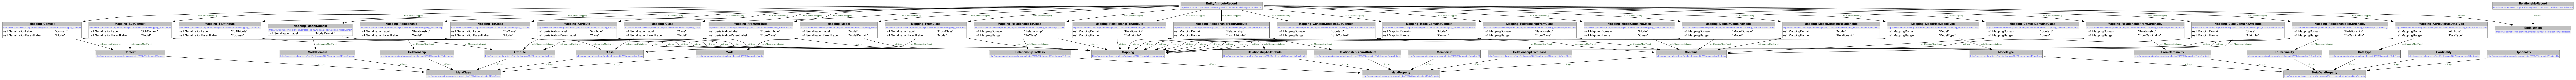

In [90]:
visualize(g)

In [91]:
g.serialize(format="xml", destination="EntityAttributeRecord.rdf")

In [92]:
graph_contents

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.

In [93]:
onto

get_ontology("http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#")

In [94]:
onto.imported_ontologies

[]

[]

In [20]:
#ser_onto = owlr.get_ontology("Serialization.owl").load()
rdf_onto = owlr.get_ontology("EntityAttributeRecord.rdf").load()

In [54]:
ser_onto = owlr.get_ontology("Serialization.owl").load()
len(list(ser_onto.world.sparql("""SELECT ?S ?P ?O WHERE { ?S ?P ?O}""")))

822

In [56]:
ser_onto = owlr.get_ontology("Serialization.owl").load()
ser_onto.imported_ontologies.append(rdf_onto)

In [58]:
list(ser_onto.world.sparql("""SELECT ?S ?P ?O WHERE { ?S ?P ?O}"""))

[[.anonymous, 6, owl.Ontology],
 [11.discourse, 6, owl.Ontology],
 [discourse.Asserts, 6, owl.ObjectProperty],
 [discourse.Asserts, 10, discourse.Posits],
 [discourse.Asserts, 6, owl.AsymmetricProperty],
 [discourse.Asserts, 6, owl.IrreflexiveProperty],
 [discourse.Asserts, 7, discourse.Declaration],
 [discourse.Asserts, 8, discourse.Posit],
 [discourse.Asserts, 89, discourse.Refutes],
 [discourse.Atom, 6, owl.ObjectProperty],
 [discourse.Atom, 7, discourse.Posit],
 [discourse.DiscourseContains, 6, owl.ObjectProperty],
 [discourse.DiscourseContains, 6, owl.TransitiveProperty],
 [discourse.DiscourseContains, 7, discourse.Discourse],
 [discourse.DiscourseContains, 8, discourse.Declaration],
 [discourse.DiscourseContains, 8, discourse.Discourse],
 [discourse.Object, 6, owl.ObjectProperty],
 [discourse.Object, 10, discourse.Atom],
 [discourse.Object, 7, discourse.Posit],
 [discourse.Posits, 6, owl.ObjectProperty],
 [discourse.Posits, 6, owl.AsymmetricProperty],
 [discourse.Posits, 6, owl.I

In [22]:
job_def_load_entities = ("Model Load", ser_onto.EntityAttributeRecord , serial_key, get_data_rows("model_entities.csv")  )
batch_manifest = [job_def_load_entities]

In [23]:


graph = loader.spawn_rdflib_graph()

In [24]:
graph = loader.load_data("Model Entities", batch_manifest=batch_manifest, rdflib_graph=graph)

AttributeError: 'NoneType' object has no attribute 'Contains'

In [35]:
a,b,c,d = batch_manifest[0]

In [39]:
d

[{'ID': 0,
  'Business Domain': 'Core',
  'Model': 'Principal Interactions',
  'ModelType': 'Conceptual',
  'Entity': 'Person',
  'Attribute': 'PersonID',
  'DataType': 'string',
  'Context': None,
  'SubContext': None,
  'Relationship': None,
  'Entity From': None,
  'Attribute From': None,
  'Cardinality From': None,
  'Entity To': None,
  'Attribute To': None,
  'Cardinality To': None},
 {'ID': 1,
  'Business Domain': 'Core',
  'Model': 'Principal Interactions',
  'ModelType': 'Conceptual',
  'Entity': 'Person',
  'Attribute': 'FirstName',
  'DataType': 'string',
  'Context': None,
  'SubContext': None,
  'Relationship': None,
  'Entity From': None,
  'Attribute From': None,
  'Cardinality From': None,
  'Entity To': None,
  'Attribute To': None,
  'Cardinality To': None},
 {'ID': 2,
  'Business Domain': 'Core',
  'Model': 'Principal Interactions',
  'ModelType': 'Conceptual',
  'Entity': 'Person',
  'Attribute': 'FamilyName',
  'DataType': 'string',
  'Context': None,
  'SubContext